# Setup

In [24]:
import pandas as pd
import scipy as spy
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression as lr

ANSWER_KEY = ["Image 1", "Image 1", "Image 2", "Image 1", "Image 2", "Image 1", "Image 2", "Image 2", "Image 1", "Image 1"]

df = pd.read_csv("responses.csv")

# Data Cleaning

In [25]:
# normalize the names of the features
df = df.rename(columns={"Timestamp" : "time",
                        "What is your age?" : "age",
                        "What is your highest level of education?" : "education",
                        "What is your job? (Say \"N/A\" if not applicable, and \"Student\" if you're a student)" : "job",
                        "How familiar are you with visual art? (Paintings, digital, sketches, etc.)" : "art_familiarity",
                        "Please describe your experience with art in a sentence, including mediums if you are an artist. If you have no familiarity with art, say \"None.\"" : "art_desc",
                        "How familiar are you with artificial intelligence (AI)?" : "ai_familiarity",
                        "What's your opinion on AI-generated art?" : "ai_opinion",
                        "Which image did you like more?" : "pref_0",
                        "Which image do you think is AI generated?" : "ai_0",
                        "Which image did you like more?.1" : "pref_1",
                        "Which image do you think is AI generated?.1" : "ai_1",
                        "Which image did you like more?.2" : "pref_2",
                        "Which image do you think is AI generated?.2" : "ai_2",
                        "Which image did you like more?.3" : "pref_3",
                        "Which image do you think is AI generated?.3" : "ai_3",
                        "Which image did you like more?.4" : "pref_4",
                        "Which image do you think is AI generated?.4" : "ai_4",
                        "Which image did you like more?.5" : "pref_5",
                        "Which image do you think is AI generated?.5" : "ai_5",
                        "Which image did you like more?.6" : "pref_6",
                        "Which image do you think is AI generated?.6" : "ai_6",
                        "Which image did you like more?.7" : "pref_7",
                        "Which image do you think is AI generated?.7" : "ai_7",
                        "Which image did you like more?.8" : "pref_8",
                        "Which image do you think is AI generated?.8" : "ai_8",
                        "Which image did you like more?.9" : "pref_9",
                        "Which image do you think is AI generated?.9" : "ai_9"})

# drop the haters
df["age"] = pd.to_numeric(df["age"], errors="coerce")
df = df.dropna(subset=["age"])

# add a feature for whether or not they got a question right
for index in range(10):
    df["ans_" + str(index)] = df["ai_" + str(index)] == ANSWER_KEY[index]
df["num_correct"] = 0
for i, row in df.iterrows():
    for index in range(10):
        if row["ans_" + str(index)] == True:
            df["num_correct"][i] = df["num_correct"][i] + 1


C:\Users\molon\AppData\Local\Temp\ipykernel_25416\3174011412.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_correct"][i] = df["num_correct"][i] + 1
C:\Users\molon\AppData\Local\Temp\ipykernel_25416\3174011412.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_correct"][i] = df["num_correct"][i] + 1
C:\Users\molon\AppData\Local\Temp\ipykernel_25416\3174011412.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

# Description
Current df struct:
|time          |age           |education     |job           |art_familiarity|art_desc     |ai_familitiary |ai_opinion   |pref_n       |ai_n         |ans_n        |
|:------------:|:------------:|:------------:|:------------:|:------------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|:-----------:|
|datetime|int|str|str|int; 1 - 5|str|int; 1 - 5|int; -1, 0, 1|"Image k"|"Image k"|boolean|

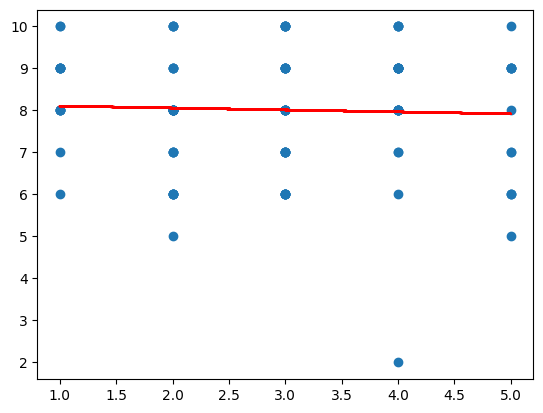

In [26]:


plt.scatter(df["art_familiarity"], df["num_correct"])
df["num_correct"]
lr1 = lr()
X = df["art_familiarity"].to_numpy().reshape(-1, 1)
x = df["art_familiarity"]
y =  df["num_correct"]
lr1.fit(X, y)
b = lr1.intercept_
m = lr1.coef_
plt.plot(x, m*x+b, "-r")

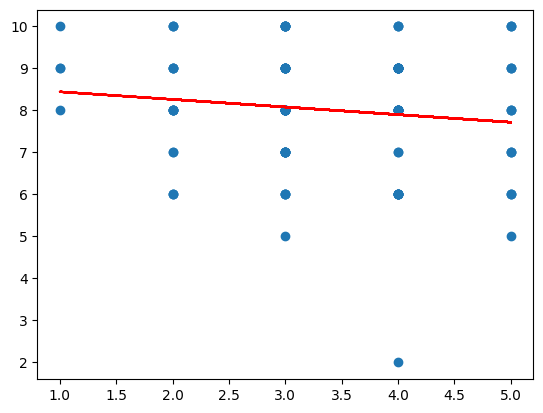

In [27]:
plt.scatter(df["ai_familiarity"], df["num_correct"])
df["num_correct"]
linreg = lr()
X1 = df["ai_familiarity"].to_numpy().reshape(-1, 1)
x1 = df["ai_familiarity"]
y1 =  df["num_correct"]
linreg.fit(X1, y1)
b1 = linreg.intercept_
m1 = linreg.coef_
plt.plot(x1, m1*x1+b1, "-r")

In [28]:
df.corr(numeric_only=True)


,age,art_familiarity,ai_familiarity,ans_0,ans_1,ans_2,ans_3,ans_4,ans_5,ans_6,ans_7,ans_8,ans_9,num_correct
age,1.000000,-0.096643,0.099593,-0.041017,-0.104255,-0.070320,-0.035077,-0.047770,0.093089,0.034011,-0.086222,0.078387,0.024689,-0.036979
art_familiarity,-0.096643,1.000000,0.192258,0.013378,0.075660,-0.050613,-0.180211,0.000311,-0.052559,0.022222,0.065685,0.062135,-0.099189,-0.038763
ai_familiarity,0.099593,0.192258,1.000000,-0.101420,-0.150302,0.079460,-0.114467,0.028436,-0.185749,0.076105,0.006244,-0.136627,0.006714,-0.128038
ans_0,-0.041017,0.013378,-0.101420,1.000000,-0.021845,0.079101,0.177540,-0.021845,-0.076230,0.116419,0.042413,0.007734,0.003800,0.297795
ans_1,-0.104255,0.075660,-0.150302,-0.021845,1.000000,-0.052758,-0.032363,0.041584,0.147515,0.135587,0.117943,-0.028861,0.018818,0.384409
ans_2,-0.070320,-0.050613,0.079460,0.079101,-0.052758,1.000000,0.160332,0.108856,-0.054457,0.055408,0.141656,0.040930,0.012693,0.323226
ans_3,-0.035077,-0.180211,-0.114467,0.177540,-0.032363,0.160332,1.000000,0.170187,0.111839,-0.020908,0.125648,0.000834,-0.011989,0.414002
ans_4,-0.047770,0.000311,0.028436,-0.021845,0.041584,0.108856,0.170187,1.000000,-0.172038,0.189026,-0.066200,-0.118402,0.117820,0.321211
ans_5,0.093089,-0.052559,-0.185749,-0.076230,0.147515,-0.054457,0.111839,-0.172038,1.000000,-0.142037,0.263854,0.129148,0.029930,0.418738
ans_6,0.034011,0.022222,0.076105,0.116419,0.135587,0.055408,-0.020908,0.189026,-0.142037,1.000000,-0.083837,0.017165,0.018248,0.344575


In [ ]:
spy.stats.ttest_ind(df)